In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython as ip
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(7.2, 5.76))
mpl.rc('font', family='Noto Sans CJK TC')
plt.rc('lines', markeredgecolor='white', markeredgewidth=0.75)
plt.rc('patch', edgecolor='white', force_edgecolor=True, linewidth=1)
ip.display.set_matplotlib_formats('svg')

In [3]:
m = sm.datasets.anes96
df = m.load_pandas().data
df_raw = df

In [4]:
df = df_raw
df = df[[c for c in df.columns if c != 'vote']]
display(df)
df_X = df
X_raw = df_X.values

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,logpopul
0,0.0,7.0,7.0,1.0,6.0,6.0,36.0,3.0,1.0,-2.302585
1,190.0,1.0,3.0,3.0,5.0,1.0,20.0,4.0,1.0,5.247550
2,31.0,7.0,2.0,2.0,6.0,1.0,24.0,6.0,1.0,3.437208
3,83.0,4.0,3.0,4.0,5.0,1.0,28.0,6.0,1.0,4.420045
4,640.0,7.0,5.0,6.0,4.0,0.0,68.0,6.0,1.0,6.461624
...,...,...,...,...,...,...,...,...,...,...
939,0.0,7.0,7.0,1.0,6.0,4.0,73.0,6.0,24.0,-2.302585
940,0.0,7.0,5.0,2.0,6.0,6.0,50.0,6.0,24.0,-2.302585
941,0.0,3.0,6.0,2.0,7.0,5.0,43.0,6.0,24.0,-2.302585
942,0.0,6.0,6.0,2.0,5.0,6.0,46.0,7.0,24.0,-2.302585


,comp_0,comp_1
0,-0.030729,0.062200
1,0.043332,-0.017820
2,0.030419,-0.022949
3,0.043822,-0.013643
4,0.066841,0.033058
...,...,...
939,-0.060536,0.032029
940,-0.053303,0.010613
941,-0.060843,-0.006511
942,-0.059869,0.012126


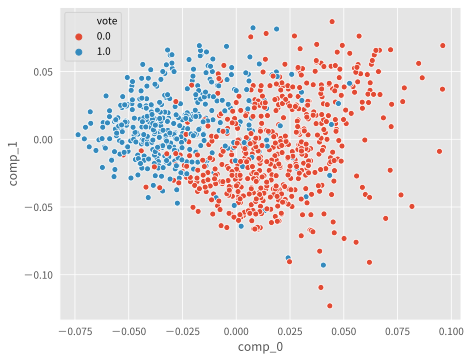

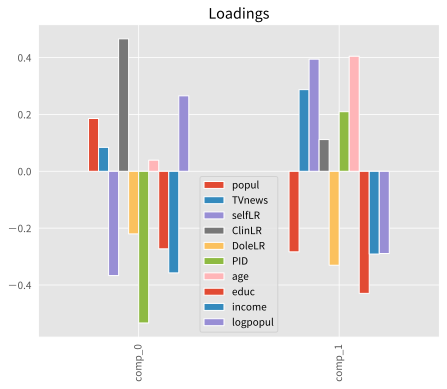

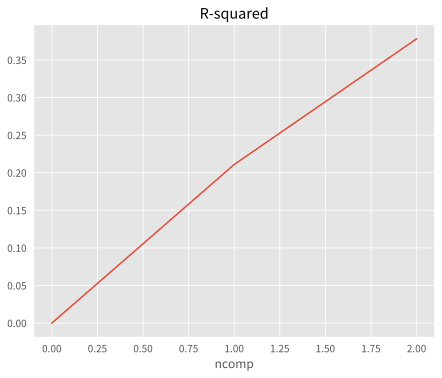

In [5]:
df = df_X
pc = sm.PCA(df, ncomp=2)
factors = pc.factors
display(factors)

sns.scatterplot(data=factors,
                x='comp_0',
                y='comp_1',
                hue=df_raw.vote)
plt.show()

pc.loadings.T.plot.bar()
plt.title('Loadings')
plt.show()

pc.rsquare.plot()
plt.title('R-squared')
plt.show()

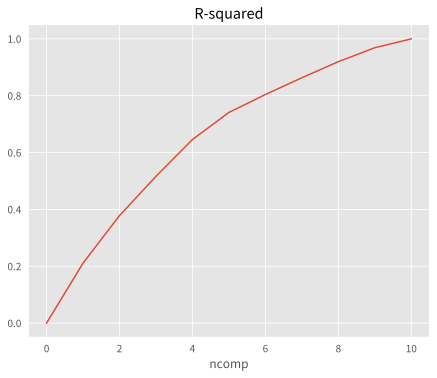

In [6]:
df = df_X
pc = sm.PCA(df)
pc.rsquare.plot()
plt.title('R-squared')
plt.show()

In [7]:
from sklearn import preprocessing
from sklearn import decomposition

array([[-1.37140186, -2.47075875],
       [ 1.93389139,  0.7078508 ],
       [ 1.35755752,  0.91160246],
       ...,
       [-2.71537946,  0.25861817],
       [-2.67190159, -0.48168121],
       [-1.12785014,  0.60308795]])

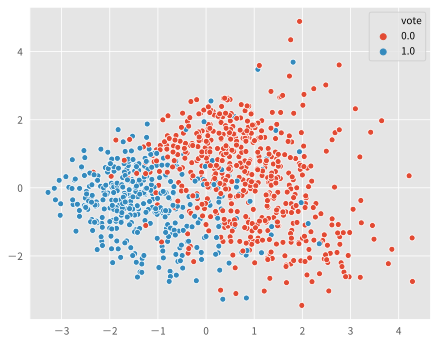

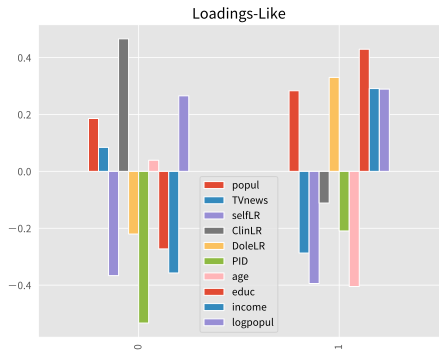

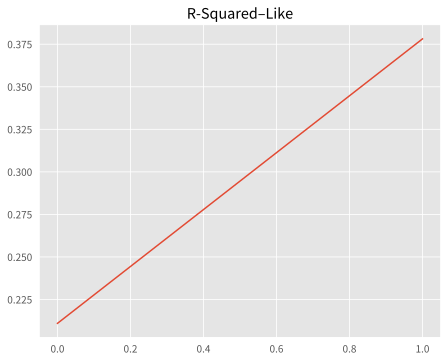

In [8]:
df = df_X
X = X_raw

pca = decomposition.PCA(n_components=2, random_state=20200501)
X = preprocessing.scale(X)
X = pca.fit_transform(X)
display(X)

sns.scatterplot(x=X[:, 0],
                y=X[:, 1],
                hue=df_raw.vote)
plt.show()

df = pd.DataFrame(pca.components_,
                  columns=df.columns)
df.plot.bar()
plt.title('Loadings-Like')
plt.show()

plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('R-Squared–Like')
plt.show()

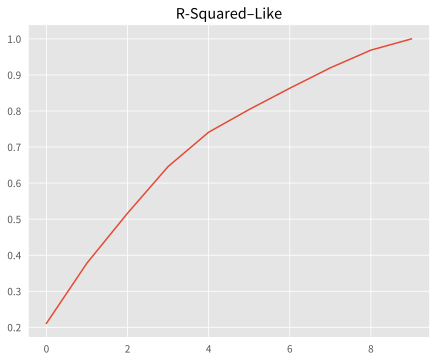

In [9]:
X = X_raw
pca = decomposition.PCA()
X = preprocessing.scale(X)
pca.fit(X)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('R-Squared–Like')
plt.show()